In [ ]:
!pip install nltk pandas matplotlib

In [ ]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import re

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
from google.colab import files

# Upload the file
uploaded = files.upload()

# Load the file content
filename = list(uploaded.keys())[0]
with open(filename, 'r', encoding='utf-8') as file:
    chat_data = file.read()

Saving WhatsApp Chat with 💫Mental Health and Happiness Club of KPRIET 💫.txt to WhatsApp Chat with 💫Mental Health and Happiness Club of KPRIET 💫 (2).txt


In [ ]:
from google.colab import files

# Upload the file
uploaded = files.upload()

# Load the file content
filename = list(uploaded.keys())[0]
with open(filename, 'r', encoding='utf-8') as file:
    chat_data = file.read()

Saving WhatsApp Chat with 💫Mental Health and Happiness Club of KPRIET 💫.txt to WhatsApp Chat with 💫Mental Health and Happiness Club of KPRIET 💫 (3).txt


In [ ]:
tokens = word_tokenize(chat_data.lower())
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]


In [ ]:
sia = SentimentIntensityAnalyzer()
sentiments = [sia.polarity_scores(word) for word in filtered_tokens]

In [ ]:
positive = sum(1 for sentiment in sentiments if sentiment['compound'] > 0)
negative = sum(1 for sentiment in sentiments if sentiment['compound'] < 0)
neutral = sum(1 for sentiment in sentiments if sentiment['compound'] == 0)


In [ ]:
freq_dist = Counter(filtered_tokens)
most_common_words = freq_dist.most_common(10)
word_sentiments = [(word, freq, sia.polarity_scores(word)) for word, freq in most_common_words]

In [ ]:
print(f"{'Word':<15}{'Frequency':<10}{'Sentiment':<10}")
for word, freq, sentiment in word_sentiments:
    if sentiment['compound'] > 0:
        sentiment_label = 'Positive'
    elif sentiment['compound'] < 0:
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Neutral'
    print(f"{word:<15}{freq:<10}{sentiment_label:<10}")

Word           Frequency Sentiment 
pm             894       Neutral   
changed        325       Neutral   
tap            322       Neutral   
learn          318       Neutral   
security       317       Positive  
code           317       Neutral   
media          200       Neutral   
omitted        200       Neutral   
happy          153       Positive  
group          127       Neutral   


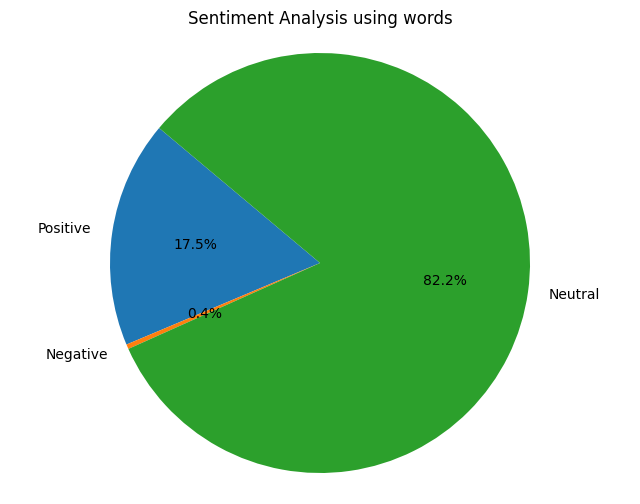

In [ ]:
labels = ['Positive', 'Negative', 'Neutral']
sizes = [positive, negative, neutral]

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Sentiment Analysis using words')
plt.show()


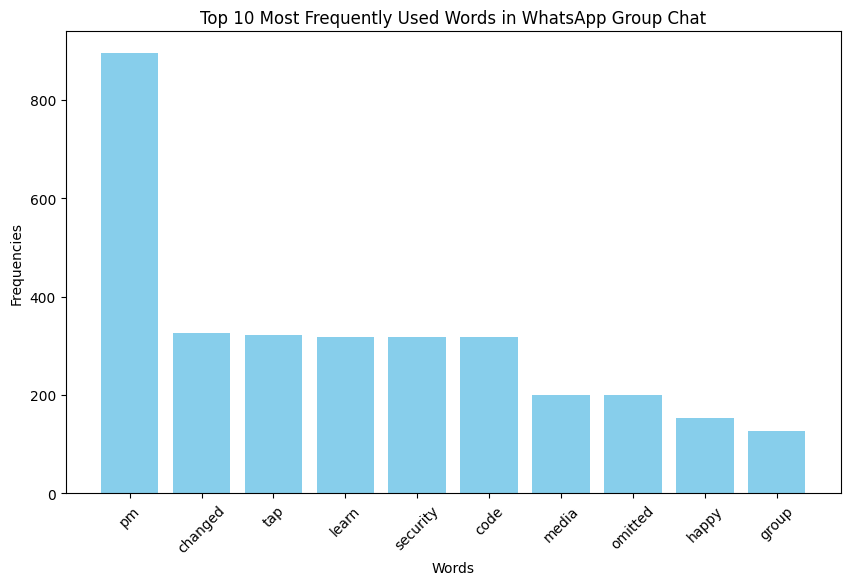

In [ ]:

words, frequencies = zip(*most_common_words)

plt.figure(figsize=(10, 6))
plt.bar(words, frequencies, color='skyblue')
plt.title('Top 10 Most Frequently Used Words in WhatsApp Group Chat')
plt.xlabel('Words')
plt.ylabel('Frequencies')
plt.xticks(rotation=45)
plt.show()


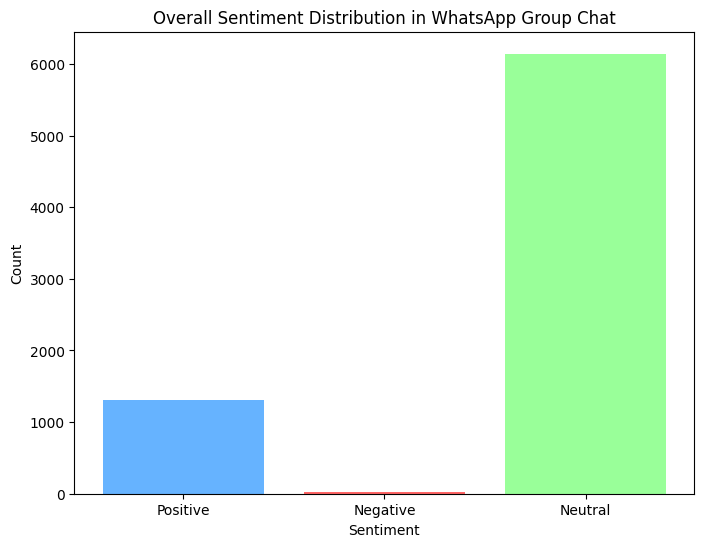

In [ ]:
sentiment_labels = ['Positive', 'Negative', 'Neutral']
sentiment_counts = [positive, negative, neutral]

plt.figure(figsize=(8, 6))
plt.bar(sentiment_labels, sentiment_counts, color=['#66b3ff', '#ff6666', '#99ff99'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Overall Sentiment Distribution')
plt.show()

In [ ]:
# Calculate overall sentiment percentages
total_words = positive + negative + neutral
positive_percentage = (positive / total_words) * 100 if total_words > 0 else 0
negative_percentage = (negative / total_words) * 100 if total_words > 0 else 0
neutral_percentage = (neutral / total_words) * 100 if total_words > 0 else 0

# Display the overall sentiment analysis
print(f"Overall Sentiment Analysis:")
print(f"Positive Words: {positive} ({positive_percentage:.2f}%)")
print(f"Negative Words: {negative} ({negative_percentage:.2f}%)")
print(f"Neutral Words: {neutral} ({neutral_percentage:.2f}%)")


Overall Sentiment Analysis:
Positive Words: 1305 (17.46%)
Negative Words: 27 (0.36%)
Neutral Words: 6143 (82.18%)


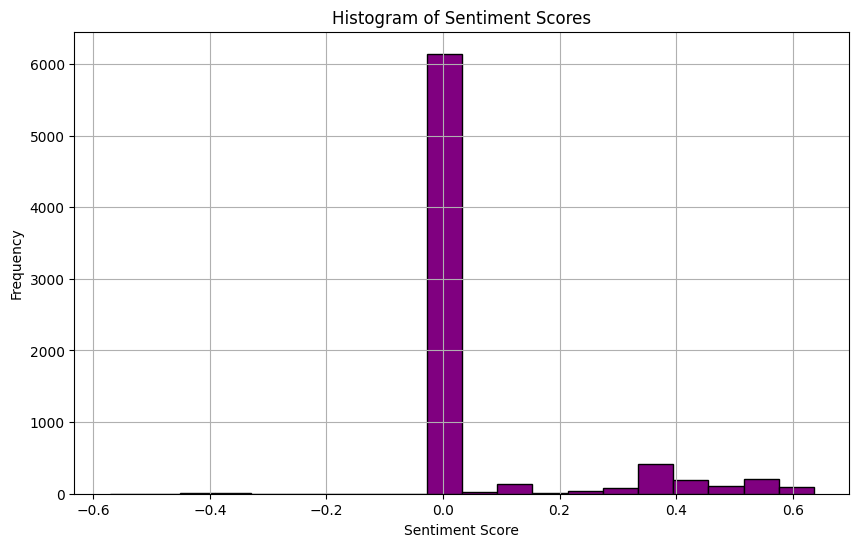

In [ ]:
# Extract sentiment scores from the tokens
sentiment_scores = [sia.polarity_scores(token)['compound'] for token in filtered_tokens]

# Plot histogram of sentiment scores
plt.figure(figsize=(10, 6))
plt.hist(sentiment_scores, bins=20, color='purple', edgecolor='black')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Histogram of Sentiment Scores')
plt.grid(True)
plt.show()
